In [1]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving marketing_AB.csv to marketing_AB.csv


In [3]:
df = pd.read_csv('marketing_AB.csv')

In [6]:
#Identify control vs test groups [cite: 12]
control = df[df['test group'] == 'psa']
test = df[df['test group'] == 'ad']

In [7]:
# Define hypothesis (H0, H1) and alpha = 0.05 [cite: 13]
# H0: No difference in conversion rates between 'ad' and 'psa' groups.
# H1: There is a significant difference in conversion rates.
alpha = 0.05

In [8]:
# Calculate group conversion metrics [cite: 14]
control_conv_rate = control['converted'].mean()
test_conv_rate = test['converted'].mean()

In [9]:
# Choose and run test (Chi-Square for categorical conversion) [cite: 15, 16]
contingency_table = pd.crosstab(df['test group'], df['converted'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

In [10]:
# Extract results
print(f"Control Conversion Rate: {control_conv_rate:.4%}")
print(f"Test Conversion Rate: {test_conv_rate:.4%}")
print(f"P-Value: {p_value:.10f}")

Control Conversion Rate: 1.7854%
Test Conversion Rate: 2.5547%
P-Value: 0.0000000000


In [11]:
# Interpret significance [cite: 17]
if p_value < alpha:
    print("Result: Statistically Significant (Reject H0)")
else:
    print("Result: Not Statistically Significant (Fail to Reject H0)")

Result: Statistically Significant (Reject H0)


/tmp/ipython-input-2951414766.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='test group', y='converted', data=df, palette='viridis')


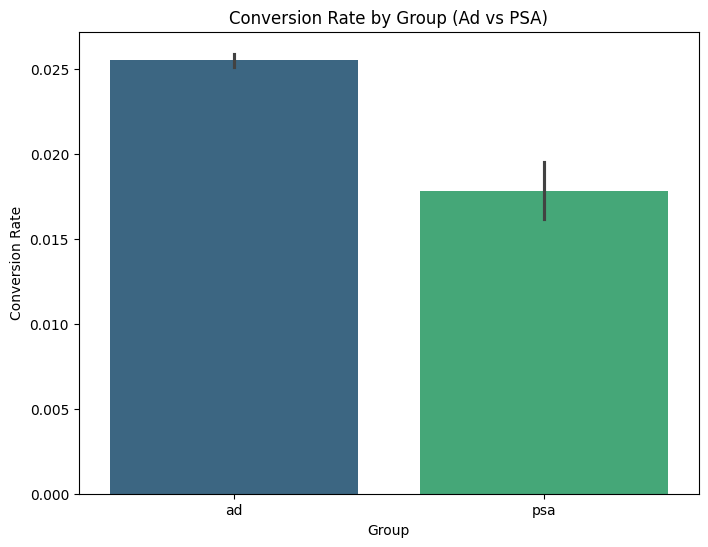

In [12]:
# Visualize group distributions [cite: 19]
plt.figure(figsize=(8, 6))
sns.barplot(x='test group', y='converted', data=df, palette='viridis')
plt.title('Conversion Rate by Group (Ad vs PSA)')
plt.ylabel('Conversion Rate')
plt.xlabel('Group')
plt.show()